In [2]:
# Add matplotlib inline magic cmd
#matplotlib inline
#import dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Import your data into a Pandas DataFrame.
# Merge your DataFrames.
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# Determine the mean, median, and mode for the following:
# The total number of rides for each city type.
# The average fares for each city type.
# The total number of drivers for each city type.
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# The number of rides for each city type.
# The fares for each city type.
# The number of drivers for each city type.
# Create a pie chart that visualizes each of the following data for each city type:
# The percent of total fares.
# The percent of total rides.
# The percent of total drivers.

In [4]:
#add directories of csv files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [5]:
# Read the city data file
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
#read ride data file
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
# get columns and rows that aren't null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [8]:
#gett data types of each col
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [9]:
city_data_df.groupby('type').count()

,city,driver_count
type,,
Rural,18,18
Suburban,36,36
Urban,66,66


In [10]:
#combine data into single set (ride on left, using left join, b/c it has more records)
pyber_data_df = pd.merge(ride_data_df,city_data_df,on=['city','city'],how='left')

#preview data
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [11]:
#create urban df
urban_cities_df = pyber_data_df[pyber_data_df.type=='Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
#create the suburban and rural frames
suburban_cities_df = pyber_data_df[pyber_data_df.type=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df.type=='Rural']
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [13]:
#get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby('city').count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [14]:
# counts=pyber_data_df.groupby(['type','city']).count()['ride_id']
# counts.loc['Urban'].head(30)
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [25]:
#get avg fare for each city
ride_counts = pyber_data_df.groupby(['type','city']).count()['ride_id']
avg_fare = pyber_data_df.groupby(['type','city']).mean()['fare']
summary = pyber_data_df.groupby(['type','city']).agg({'ride_id':'count','fare':'mean','driver_count':'mean'})
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
summary.loc[('Urban')].head(10)

,ride_id,fare,driver_count
city,,,
Amandaburgh,18,24.641667,12.0
Barajasview,22,25.332273,26.0
Carriemouth,27,28.314444,52.0
Christopherfurt,27,24.501852,41.0
Deanville,19,25.842632,49.0
East Kaylahaven,29,23.757931,65.0
Erikaland,12,24.906667,37.0
Grahamburgh,25,25.221200,61.0
Huntermouth,24,28.993750,37.0


In [19]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [26]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [27]:
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

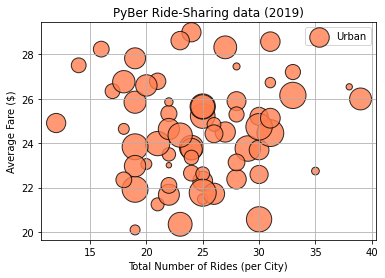

In [36]:
#build scatter plot for urban cities
plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count,
c='coral', edgecolors='black',linewidths=1,alpha=0.8,label='Urban')
plt.title('PyBer Ride-Sharing data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (per City)')
plt.grid(True)
# add legend
plt.legend()

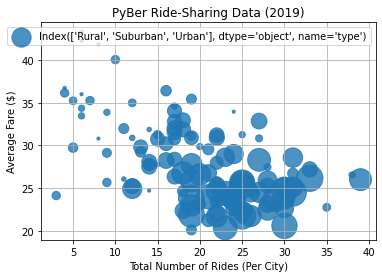

In [57]:

plt.scatter(summary.ride_id,summary.fare,
s=10*summary.driver_count,alpha=0.8)
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

In [32]:
summary.loc[]

Index(['ride_id', 'fare', 'driver_count'], dtype='object')

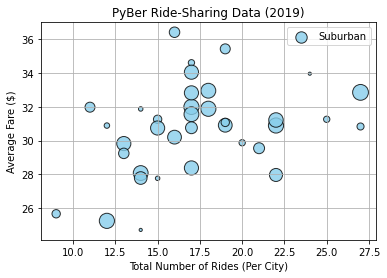

In [38]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

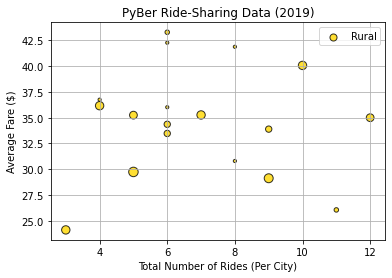

In [39]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

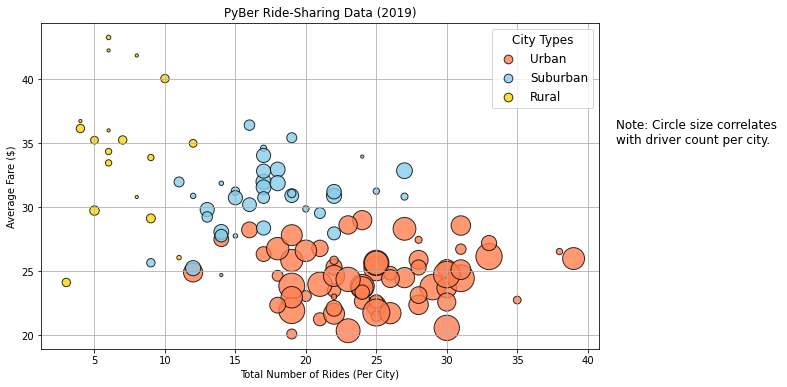

<Figure size 432x288 with 0 Axes>

In [60]:
# Add the scatter charts for each type of city.
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
lgnd = plt.legend(fontsize=12,mode='Expanded',scatterpoints=1,loc='best',title='City Types')
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize(12)
#incorporate a text lable about circle size
note = "Note: Circle size correlates " + "\n" + "with driver count per city."
plt.text(42,35, note, fontsize=12)
# Show the plot
plt.show()
# Save the figure.
plt.savefig("analysis/Fig1.png")

In [56]:
summary.index.get_level_values(0).unique()

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='type')